# Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. 
Most of the real-world regression models involve multiple predictors. 

$$ 𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
𝑋_1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒1 , 𝑋_2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒2 , 𝑋_3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒3 , 𝑋_4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒4
𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡 ,𝑏_1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒1 , 𝑏_2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒2 , 𝑏_3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒3 , 𝑏_4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒4 $$
* The equation is given by $$ 𝑌 =𝑎+𝑏_1𝑋_1+𝑏_2 𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4 $$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\kaout\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
pd.set_option('display.max_columns', 29)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y=df['price']

In [6]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(Z,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lm.intercept_

-15806.624626329198

In [8]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

# The final estimated linear model we get?
Plugging in the actual values we get: 
* price = -15806.62 + 53.49 x horsepower +4.7 x curb-weight + 81.5 x engine-size +36.05 x highway-mpg

# R-squared:

In [19]:
print('The R-square is: ',lm.score(Z,Y))
#We can say that ~ 81% of the variation of the price is explained by this simple linear model "engine-size"

The R-square is:  0.8093562806577457


# Mean Squared Error:

In [21]:
from sklearn.metrics import mean_squared_error
y_pred=lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ',mean_squared_error(y_pred,Y))

The mean square error of price and predicted value using multifit is:  11980366.87072649


# Distribution plot:
One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

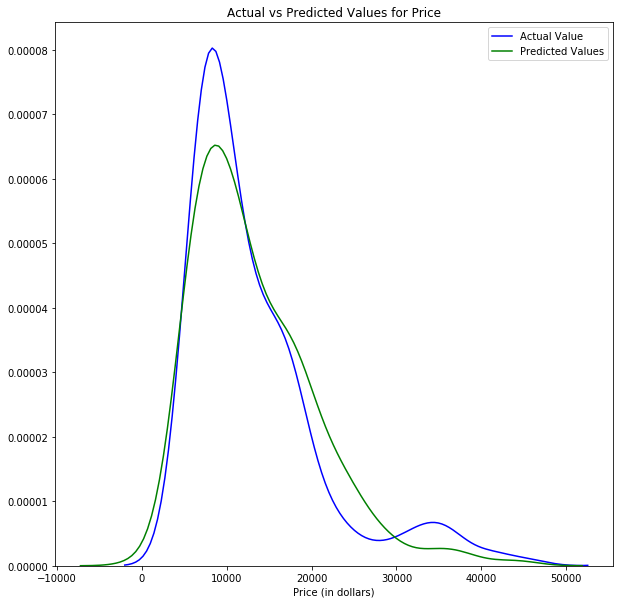

In [15]:
plt.figure(figsize=(10, 10))
ax1 = sns.distplot(df['price'], hist=False, color="b", label="Actual Value")
sns.distplot(y_pred, hist=False, color="g", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.show()


We can see that the predicted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

# Pipeline:
* we can create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,Y)

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

In [18]:
Y[0:4].values

array([13495., 16500., 16500., 13950.])

# Ridge regression with GridSearchCV:

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]


In [9]:
Grid = GridSearchCV(Ridge(), parameters1,cv=4)
Grid.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],df['price'])
Grid.best_estimator_

C:\Users\kaout\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
Grid.best_estimator_.score(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],df['price'])

0.8087220102629341

In [11]:
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],df['price'])
Grid2.best_estimator_.score(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],df['price'])

C:\Users\kaout\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8067357870903057